## **Project 1**: *Data PreProcessing*


Using a Python version 3.10 or newer
1. Update pip: `python -m pip install --upgrade pip`
1. Install the requirements `pip install -r requirements.txt`

You will now have the required dependencies to run our Python app.

- pandas
- numpy
- matplotlib
- ipykernal (for Jupiter notebook)

### Exploring Data Preprocessing Topics

- Missing Values
- Duplicate Data
- Outliers
- Aggregation
- Discretization
- Principle Components Analysis
- Sampling
- Testing/Training Split
- Saving a dataframe
- Dropping fields
- Means and Standard Deviation
- Concatenating Rows and Columns
- Calculated Fields
- Feature Normalization
- Shuffling dataframes
- Sorting dataframes

**Description Of The Attributes**
| Column      | Description                                                                                                      |
|-------------|------------------------------------------------------------------------------------------------------------------|
| age         | Age in years                                                                                                     |
| sex         | Sex (1 = male; 0 = female)                                                                                       |
| cp          | Chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)                    |
| trestbps    | Resting blood pressure (in mm Hg on admission to the hospital)                                                   |
| chol        | Serum cholesterol in mg/dl                                                                                       |
| fbs         | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                                            |
| restecg     | Resting electrocardiograph results (0: normal, 1: ST-T wave abnormality, 2: probable or definite LV hypertrophy) |
| thalach     | Maximum heart rate achieved                                                                                      |
| exang       | Exercise induced angina (1 = yes; 0 = no)                                                                        |
| oldpeak     | ST depression induced by exercise relative to rest                                                               |
| slope       | The slope of the peak exercise ST segment (0: upsloping, 1: flat, 2: downsloping)                                |
| ca          | Number of major vessels (0-3) colored by fluoroscope                                                             |
| thal        | 0 = normal; 1 = fixed defect; 2 = reversible defect                                                              |
| condition   | 0 = no disease, 1 = disease                                                                                      |


##### Duplicate Data, Missing Values, Outliers

Number of instances = 303
Number of attributes = 13
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
1    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
2    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
3    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
4    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   


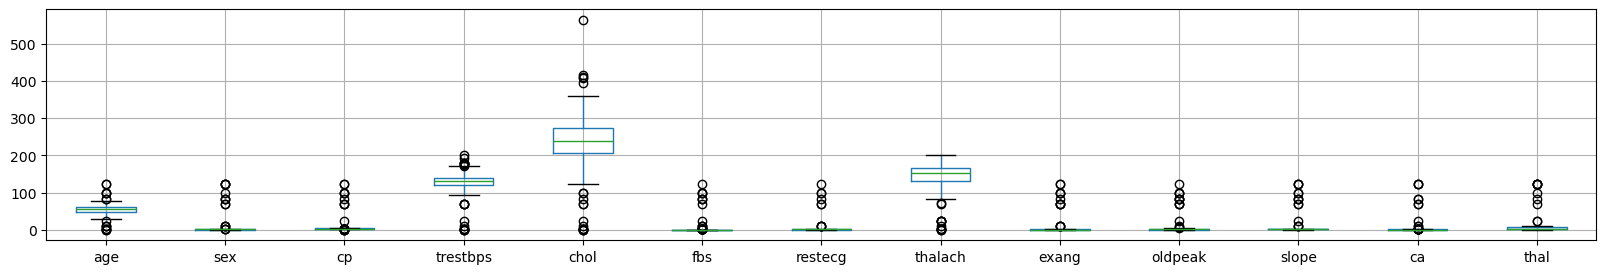

Number of rows before removing outliers = 302
Number of rows after removing outliers = 284
          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.900324 -0.168176 -0.117864  1.154193  0.721817 -0.185312 -0.069027   
1    0.900324 -0.168176 -0.117864 -0.239633 -0.101206 -0.185312 -0.069027   
2   -1.199456 -0.168176 -0.181334  0.108824  0.202013 -0.185312 -0.224237   
3   -0.919485 -0.224062 -0.244804  0.108824 -0.462181 -0.185312 -0.069027   
4    0.130405 -0.168176 -0.244804 -0.239633 -0.000133 -0.185312 -0.224237   
..        ...       ...       ...       ...       ...       ...       ...   
298 -0.639515 -0.168176 -0.308274 -0.588089  0.404159 -0.185312 -0.224237   
299  0.970317 -0.168176 -0.117864  0.596663 -0.621010 -0.119302 -0.224237   
300  0.200397 -0.168176 -0.117864  0.108824 -1.516228 -0.185312 -0.224237   
301  0.200397 -0.224062 -0.244804  0.108824 -0.000133 -0.185312 -0.069027   
302 -1.129463 -0.168176 -0.181334  0.387589 -0.880912 -0.18531

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

data = pd.read_csv('data/heart_disease.csv')
data.columns = ['age', 'sex', 'cp', 'trestbps',
                'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca',
                'thal', 'disease']
data = data.drop(['disease'],axis=1)

# Shape of the dataset
print(f'Number of instances = {data.shape[0]}')
print(f'Number of attributes = {data.shape[1]}')
print(data)

# Duplicate Data
dups = data.duplicated()
print(f'Number of duplicate rows = {dups.sum()}\n')
print('Removing duplicate rows\n')
data2 = data.drop_duplicates()
print(f'Number of instances after dropping duplicates = {data2.shape[0]}')
print(data2)

# Missing Values replace with NaN
data3 = data2.replace('?', np.nan)

# Convert columns to numeric, coercing errors
for col in data3.columns:
    data3[col] = pd.to_numeric(data3[col], errors='coerce')
    
print(data3)

print('Number of missing values:')
for col in data3.columns:
    print(f'\t{col}: {data3[col].isna().sum()}')

# Missing Values replace with Median value of attribute
print('Replace missing values with median')
for col in data3.columns:
    column = f'{col}'
    datacol = data3[column]
    data3[column] = datacol.fillna(datacol.median())

# Missing Values recount and print dataset
print('Number of missing values:')
for col in data3.columns:
    print(f'\t{col}: {data3[col].isna().sum()}')
print(data3)

# Outliers
for col in data3.columns:
    column = f'{col}'
    datacol = data3[column]
    data3[col] = pd.to_numeric(data3[column])

data3.boxplot(figsize=(20,3))
plt.show()

Z = (data3-data3.mean())/data3.std()
print(f'Number of rows before removing outliers = {Z.shape[0]}')
Z2 = Z.loc[((Z > -3).sum(axis=1)==13) & ((Z <= 3).sum(axis=1)==13),:]
print(f'Number of rows after removing outliers = {Z2.shape[0]}')
print(Z2)

## **Project 2**: *Linear Regression & Classification Tree*



### **Regression Models**

In [3]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the preprocessed data
data = Z2  # Z2 is the preprocessed dataframe without outliers

# Split data into training and test sets (80-20 split)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

**Simple Linear Regression Model**

In [5]:
# Selecting 'age' as independent variable and 'trestbps' as dependent variable
X_train_simple = train_data[['age']]
y_train_simple = train_data['trestbps']
X_test_simple = test_data[['age']]
y_test_simple = test_data['trestbps']

# Creating and training the model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

# Making predictions on the test set
y_pred_simple = simple_model.predict(X_test_simple)

# Evaluate the model
print("Simple Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test_simple, y_pred_simple))
print("R-squared:", r2_score(y_test_simple, y_pred_simple))


Simple Linear Regression
Mean Squared Error: 0.38073677984264553
R-squared: 0.1132068206849367


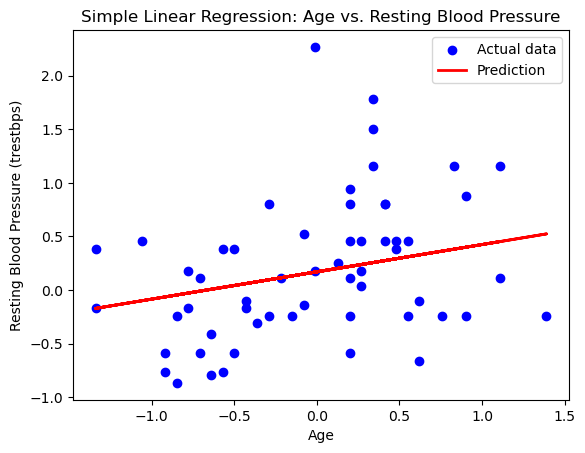

In [6]:
# Plotting the results
plt.scatter(X_test_simple, y_test_simple, color='blue', label="Actual data")
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label="Prediction")
plt.title("Simple Linear Regression: Age vs. Resting Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure (trestbps)")
plt.legend()
plt.show()

**Multiple Linear Regression Model**

In [7]:
# Selecting multiple features for prediction
X_train_multi = train_data[['age', 'chol', 'thalach']]
y_train_multi = train_data['trestbps']
X_test_multi = test_data[['age', 'chol', 'thalach']]
y_test_multi = test_data['trestbps']

# Creating and training the model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Making predictions on the test set
y_pred_multi = multi_model.predict(X_test_multi)



Multiple Linear Regression
Mean Squared Error: 0.37662225071217614
R-squared: 0.1227901773821839


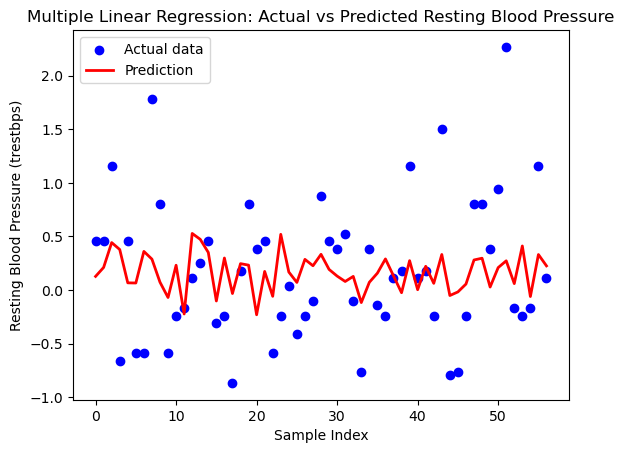

In [8]:
# Evaluate the model
print("\nMultiple Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test_multi, y_pred_multi))
print("R-squared:", r2_score(y_test_multi, y_pred_multi))

# Plotting actual vs. predicted values for the test set in Multiple Regression
plt.scatter(range(len(y_test_multi)), y_test_multi, color='blue', label="Actual data")
plt.plot(range(len(y_test_multi)), y_pred_multi, color='red', linewidth=2, label="Prediction")
plt.title("Multiple Linear Regression: Actual vs Predicted Resting Blood Pressure")
plt.xlabel("Sample Index")
plt.ylabel("Resting Blood Pressure (trestbps)")
plt.legend()
plt.show()

**Polynomial Regression Model**

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Set up polynomial features for degree 2 (can adjust degree if needed)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_simple)
X_poly_test = poly.transform(X_test_simple)

# Train the polynomial model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train_simple)

LinearRegression()

In [17]:
# Generate a range of X values within the observed range
X_range = np.linspace(X_test_simple.min(), X_test_simple.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_poly_pred_range = poly_model.predict(X_range_poly)

# Predict on the test set (for MSE and R-squared calculation)
y_poly_pred = poly_model.predict(X_poly_test)


c:\Apps\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Polynomial Regression
Mean Squared Error: 0.3804892180413344
R-squared: 0.11378342932503804


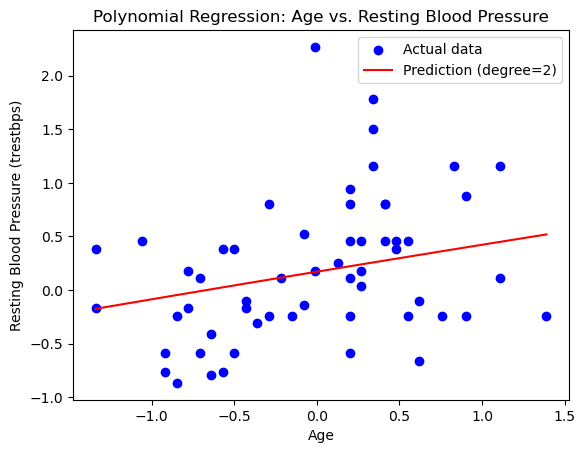

In [18]:
# Evaluation metrics
print("Polynomial Regression")
print("Mean Squared Error:", mean_squared_error(y_test_simple, y_poly_pred))
print("R-squared:", r2_score(y_test_simple, y_poly_pred))

# Plot the Polynomial Regression results as a smooth line
plt.scatter(X_test_simple, y_test_simple, color='blue', label="Actual data")
plt.plot(X_range, y_poly_pred_range, color='red', label="Prediction (degree=2)")
plt.title("Polynomial Regression: Age vs. Resting Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure (trestbps)")
plt.legend()
plt.show()

**Ridge Regression Model**

In [19]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_multi, y_train_multi)
y_ridge_pred = ridge_model.predict(X_test_multi)

print("\nRidge Regression")
print("Mean Squared Error:", mean_squared_error(y_test_multi, y_ridge_pred))
print("R-squared:", r2_score(y_test_multi, y_ridge_pred))



Ridge Regression
Mean Squared Error: 0.3771117477541704
R-squared: 0.12165006520727184


**Lasso Regression**

In [20]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_multi, y_train_multi)
y_lasso_pred = lasso_model.predict(X_test_multi)

print("\nLasso Regression")
print("Mean Squared Error:", mean_squared_error(y_test_multi, y_lasso_pred))
print("R-squared:", r2_score(y_test_multi, y_lasso_pred))


Lasso Regression
Mean Squared Error: 0.4293824126299884
R-squared: -9.616879012686042e-05


**Decision Tree Regressor (2nd Multiple Regression Model)**

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=4, random_state=0)  # Adjust max_depth as needed
tree_model.fit(X_train_multi, y_train_multi)
y_tree_pred = tree_model.predict(X_test_multi)


Decision Tree Regression
Mean Squared Error: 0.3885725703560488
R-squared: 0.0949560869767313


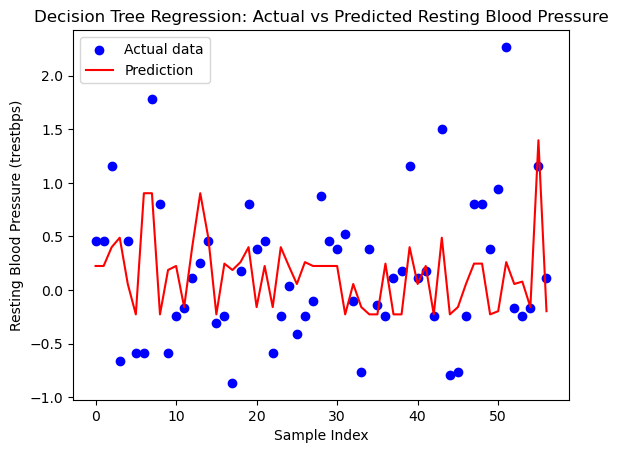

In [22]:
print("\nDecision Tree Regression")
print("Mean Squared Error:", mean_squared_error(y_test_multi, y_tree_pred))
print("R-squared:", r2_score(y_test_multi, y_tree_pred))

# Plot Decision Tree Regression results
plt.scatter(range(len(y_test_multi)), y_test_multi, color='blue', label="Actual data")
plt.plot(range(len(y_test_multi)), y_tree_pred, color='red', label="Prediction")
plt.title("Decision Tree Regression: Actual vs Predicted Resting Blood Pressure")
plt.xlabel("Sample Index")
plt.ylabel("Resting Blood Pressure (trestbps)")
plt.legend()
plt.show()